In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 1: Load and Preprocess Data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# File path to the CSV in your Downloads folder
file_path = r"C:\Users\rrdas\Downloads\risk_compliance_data.csv"

# Load the data
data = load_data(file_path)

# Check the first few rows of the dataset
print(data.head())

         Date  Risk_Indicator_1  Risk_Indicator_2  Risk_Indicator_3  \
0  01/01/2023         54.967142         36.996777         59.872326   
1  02/01/2023         48.617357         34.623168         67.832220   
2  03/01/2023         56.476885         30.298152         58.113701   
3  04/01/2023         65.230299         26.765316         65.380577   
4  05/01/2023         47.658466         33.491117         41.595780   

   Compliance_Status  Feature_1  Feature_2  Feature_3  Incident_Severity  
0                  1  22.022357   8.198657  31.437765                  5  
1                  1  25.956452   8.071600  34.398326                  8  
2                  1  29.085799  12.160112  18.643427                  1  
3                  1  18.382410  11.885577  31.868945                  6  
4                  0  21.965718  10.974610  22.873409                  4  


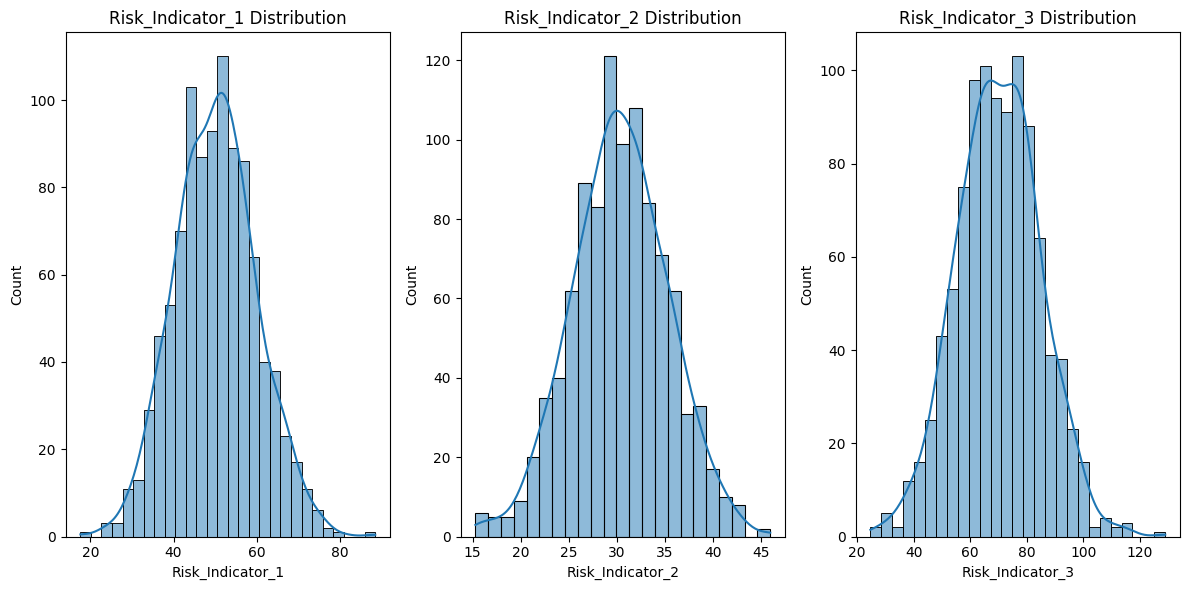

In [7]:
# Step 2: Risk Monitoring Dashboards (Tracking Key Risk Indicators)
def plot_risk_dashboard(data, risk_columns):
    """
    Function to plot a dashboard for monitoring key risk indicators.
    risk_columns: List of columns that represent key risk indicators in the dataset.
    """
    # Ensure you're working in the notebook environment for inline plotting
    %matplotlib inline
    
    plt.figure(figsize=(12, 6))  # Set figure size
    
    for i, column in enumerate(risk_columns):
        plt.subplot(1, len(risk_columns), i + 1)  # Create a subplot for each risk column
        sns.histplot(data[column], kde=True)  # Plot the histogram and KDE (Kernel Density Estimate)
        plt.title(f'{column} Distribution')  # Set the title of each plot
    
    plt.tight_layout()  # Ensure that plots don't overlap
    plt.show()  # Display the plots

# Sample usage (assuming the 'data' variable is loaded with the risk dataset)
# Example: Specify the columns representing risk indicators
risk_columns = ['Risk_Indicator_1', 'Risk_Indicator_2', 'Risk_Indicator_3']  # Replace with actual column names

# Call the function to plot the dashboard
plot_risk_dashboard(data, risk_columns)


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.60      0.53       136
           1       0.58      0.46      0.51       164

    accuracy                           0.52       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.54      0.52      0.52       300



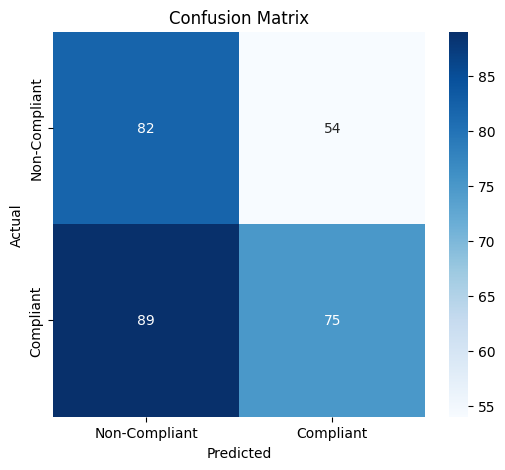

In [9]:
# Step 3: Compliance-focused Models (Risk Assessment Models)
def build_compliance_model(data, target_column, feature_columns):
    """
    Build a simple model for compliance (e.g., classification).
    This function assumes a classification problem where compliance status is the target.
    """
    # Feature matrix X (independent variables) and target vector y (dependent variable)
    X = data[feature_columns]
    y = data[target_column]
    
    # Split the data into training and test sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Create and train a logistic regression model
    model = LogisticRegression(solver='liblinear')  # 'liblinear' solver for small datasets
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluation: Classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Compliant', 'Compliant'], yticklabels=['Non-Compliant', 'Compliant'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Sample usage (assuming the 'data' variable is loaded with the risk dataset)
# Example: Specify the target and feature columns
target_column = 'Compliance_Status'  # Replace with the actual target column
feature_columns = ['Risk_Indicator_1', 'Risk_Indicator_2', 'Risk_Indicator_3', 'Feature_1', 'Feature_2', 'Feature_3']  # Replace with actual feature columns

# Call the function to build and evaluate the model
build_compliance_model(data, target_column, feature_columns)

In [14]:
# Step 4: Trend Analysis (Risk Forecasting)
def trend_analysis(data, date_column, risk_column):
    """Analyze risk trends over time using moving averages."""
    data['Date'] = pd.to_datetime(data[date_column])
    data.set_index('Date', inplace=True)
    
    # Resample data to monthly frequency and compute the rolling mean
    data_resampled = data[risk_column].resample('M').mean()
    data_resampled_rolling = data_resampled.rolling(window=6).mean()  # 6-month rolling window
    
    # Plot the trend
    plt.figure(figsize=(10, 6))
    plt.plot(data_resampled, label=f'{risk_column} Monthly Average')
    plt.plot(data_resampled_rolling, label='6-Month Rolling Average', linestyle='--', color='red')
    plt.title(f'{risk_column} Trend Analysis')
    plt.legend()
    plt.show()

# Step 5: Incident Analysis (Detecting and Analyzing Incidents)
def incident_analysis(data, incident_column, threshold):
    """Detect incidents based on a threshold and provide analysis."""
    incidents = data[data[incident_column] > threshold]
    
    print(f'Number of incidents detected: {len(incidents)}')
    print(incidents)